## KNN (classificatio) and Clustering (unsupervised learning)

In [2]:
## Use the Iris example
## KNN helps to identify the type
## Classification algorithm

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
import seaborn as sns


from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [7]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [8]:
df["target"] = iris.target

In [11]:
df["target"].unique()

array([0, 1, 2])

In [12]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
df["flower_name"] = df["target"].apply(lambda x: iris.target_names[x])

In [17]:
df.groupby("flower_name").count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
flower_name,,,,,
setosa,50,50,50,50,50
versicolor,50,50,50,50,50
virginica,50,50,50,50,50


In [18]:
df['flower_name'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: flower_name, dtype: int64

In [19]:
setosa = df[:50]
versicolor = df[50:100]
virginica = df[100:]

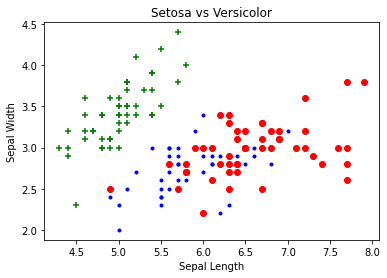

In [20]:
x0 = setosa['sepal length (cm)']
y0 = setosa['sepal width (cm)']
x1 = versicolor['sepal length (cm)']
y1 = versicolor['sepal width (cm)']
x2 = virginica['sepal length (cm)']
y2 = virginica['sepal width (cm)']

plt.title('Setosa vs Versicolor')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(x0, y0,color="green",marker='+')
plt.scatter(x1, y1,color="blue",marker='.');
plt.scatter(x2, y2,color="red",marker='o');

In [22]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


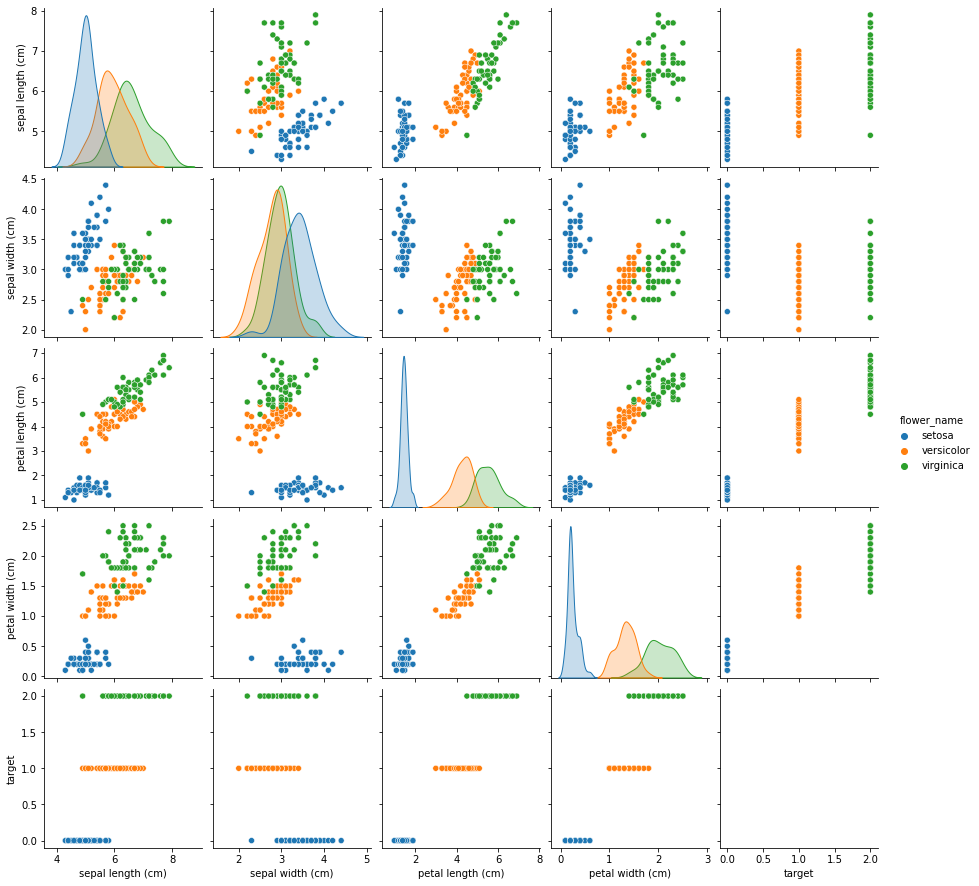

In [21]:
sns.pairplot(df, hue='flower_name')

In [24]:
X = df.drop(columns=["target", "flower_name"])
y = df["target"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
KNeighborsClassifier

In [28]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
y_predict = model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

In [33]:
model.score(X_test,y_test)

0.9333333333333333

In [30]:
cm

array([[ 9,  0,  0],
       [ 0, 11,  1],
       [ 0,  1,  8]])

Text(42.0, 0.5, 'Truth')

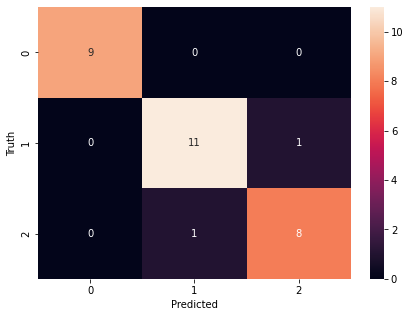

In [31]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Clustering unsupervised learmning

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn import linear_model
import seaborn as sns


from sklearn.datasets import load_iris

In [35]:
## KNN vs KMeans
## No label, take data, no target

In [37]:
iris = load_iris()
X = iris.data
model = KMeans(n_clusters=3)

In [38]:
model.fit(X)

KMeans(n_clusters=3)

In [39]:
labels = model.labels_

Text(0.5, 1.0, 'Clustering of Iris Dataset')

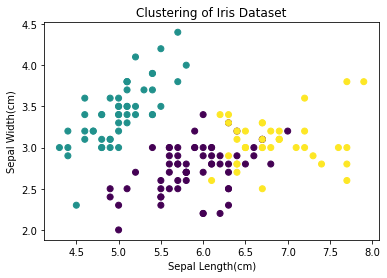

In [41]:
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.xlabel('Sepal Length(cm)')
plt.ylabel('Sepal Width(cm)')
plt.title('Clustering of Iris Dataset')

In [42]:
model.score(X)

-78.85144142614601

In [43]:
## The more n_clusters, the score closer to 0. 